#🏦 Lending Club Loan 💰

# Introduction
Using historical data on loans from Lendig Club - including information on whether or not the borrower defaulted (charge-off) - the main objective of this notebook will be to predict if a potential borrower is likely to pay back the loan.

#Our Goal
In this capstone project, You will going to work on LendingClub Dataset obtained from Kaggle and the goal is to try find a better prediction model to prevent investing on '"bad loans". To do that, First, going to implement some data engineering and preprocessing on LendingClub dataset to prepare data for analysis and modeling. Second, you need to apply explanatory data analysis (EDA) to investigate the features. At the end, you use preprocessed data on LendingClub loans labeled on whether or not the borrower defaulted (charged-off) to develop a model and predict whether or not a borrower will pay back their loan. This way in the future when we get a new potential customer who assigned with higher interest loan, we can assess whether or not they are likely to pay back the loan.




**Let's import necessary packages**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

print("Imports Successful")

Imports Successful


In [ ]:
# pd.set_option("display.max_columns", 500)
# pd.set_option("display.max_rows", 500)
# pd.set_option("display.float_format", lambda x: "%.3f" % x)

**Defining the nunction which will tell us the percentage of null values**

In [ ]:
def nullPercentage(data):
    print(round((data.isnull().sum() / len(data.index) * 100), 2))

**Setting File Path / Loading the data**

Importing accepted data

In [ ]:
# df_accepted = pd.read_csv("/content/drive/MyDrive/LendingClub/data/accepted_2007_to_2018Q4.csv")
# print(df_accepted.shape)

# df_rejected = pd.read_csv("/content/drive/MyDrive/LendingClub/data/rejected_2007_to_2018Q4.csv")
# print(df_rejected.shape)

In [ ]:
# print(df_accepted.shape)
# df_accepted.describe()

In [ ]:
# df_accepted.head()

In [ ]:
# df_accepted = df_accepted[df_accepted.loan_status.isin(['Fully Paid', 'Charged Off'])]
# # df_accepted.loan_status.unique()

In [ ]:
# nullPercentage(df_accepted)

**Now lets just import the combined dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/LendingClub/combinedByYasin.csv')

In [ ]:
data.head()

,Unnamed: 0,Amount Requested,Risk_Score,Debt-To-Income Ratio,Employment Length,Target
0,0,3600.0,677.0,5.91,10,1
1,1,24700.0,717.0,16.06,10,1
2,2,20000.0,697.0,10.78,10,1
3,3,10400.0,697.0,25.37,3,1
4,4,11950.0,692.0,10.20,4,1


In [ ]:
data.Target.unique()

array([1, 0])

**Lets visully have a look at the data of fully paid and charged off values count**

In [ ]:
# sns.countplot(x="loan_status", data=df_accepted)

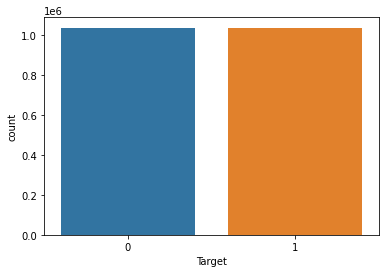

In [ ]:
sns.countplot(x='Target',data=data)

#### Doing this i drawed my conclusion that i will move further with combined data and will consider Target to be predicted

**checking now null values per columns:**

In [ ]:
data.isnull().sum().sort_values(ascending=False)

Target                  0
Employment Length       0
Debt-To-Income Ratio    0
Risk_Score              0
Amount Requested        0
Unnamed: 0              0
dtype: int64

**Since the data is already cleaned we do not need to perform any cleaning steps so lets quickly perform Relationship analysis**

In [ ]:
data.columns

Index(['Unnamed: 0', 'Amount Requested', 'Risk_Score', 'Debt-To-Income Ratio',
       'Employment Length', 'Target'],
      dtype='object')

**First lets just remove the spaces from our column name. !Not a necessary step but i just prefer it**

In [ ]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-','_')
data.columns

Index(['unnamed:_0', 'amount_requested', 'risk_score', 'debt_to_income_ratio',
       'employment_length', 'target'],
      dtype='object')

In [ ]:
#Lets just drop unnamed:_0
del data['unnamed:_0']

In [ ]:
data.columns

Index(['amount_requested', 'risk_score', 'debt_to_income_ratio',
       'employment_length', 'target'],
      dtype='object')

## Lets check feature by feature for the distributions

**For getting started lets take risk_sore feature into consideration**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


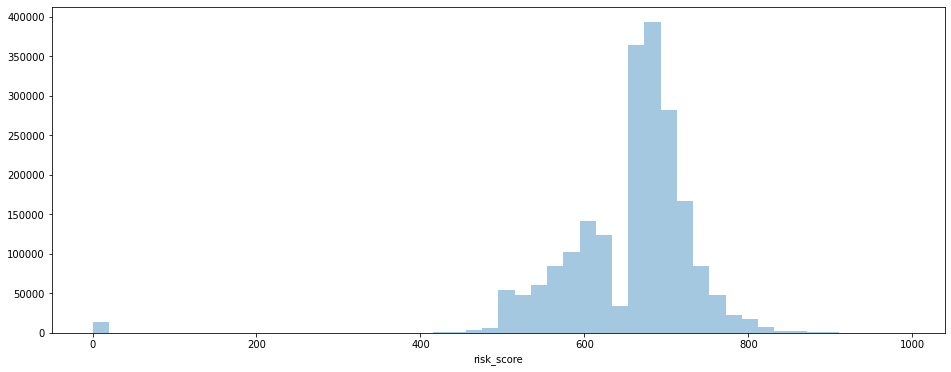

In [ ]:
#Histogram of distribution
plt.figure(figsize=(16,6))
sns.distplot(a=data['risk_score'], kde=False)

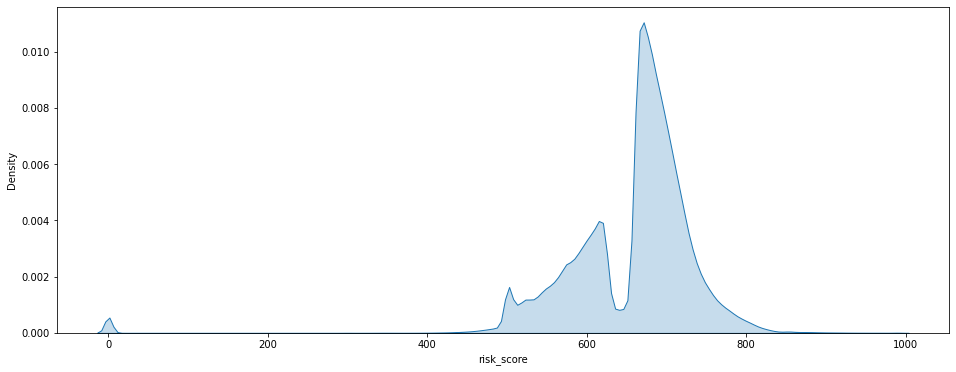

In [ ]:
# KDE plot 
plt.figure(figsize=(16,6))
sns.kdeplot(data=data['risk_score'], shade=True)

**Employement Length**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


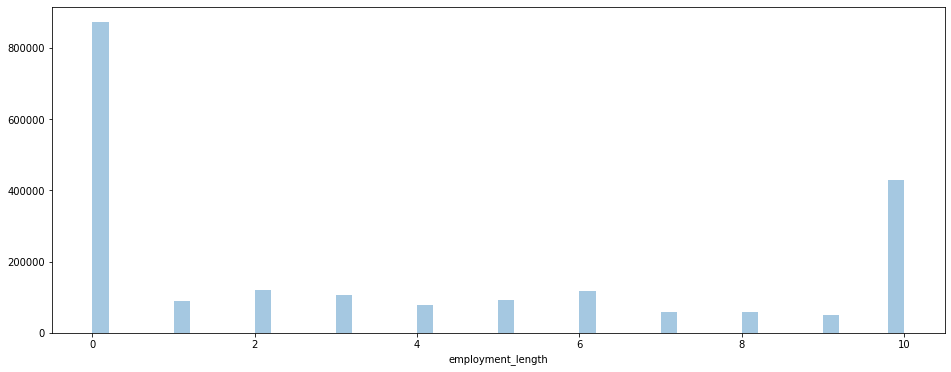

In [ ]:
#Histogram of distribution
plt.figure(figsize=(16,6))
sns.distplot(a=data['employment_length'], kde=False)

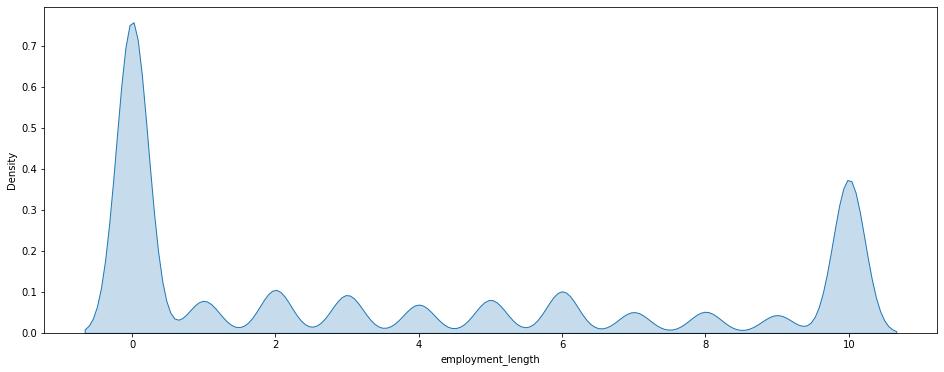

In [ ]:
# KDE plot 
plt.figure(figsize=(16,6))
sns.kdeplot(data=data['employment_length'], shade=True)

**Amount Requested**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


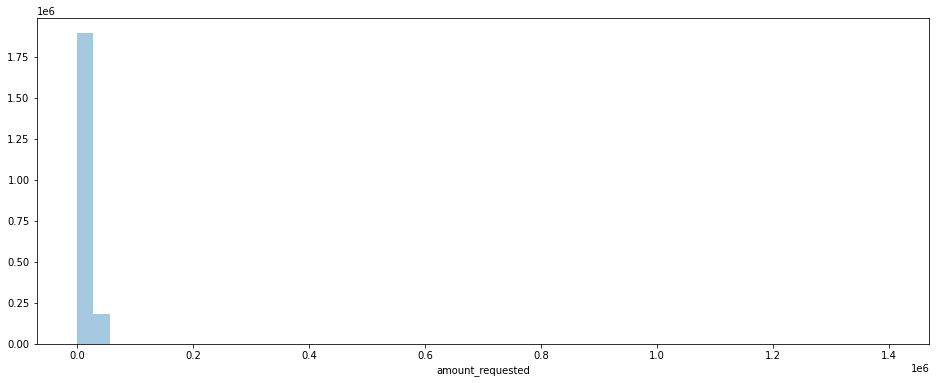

In [ ]:
#Histogram of distribution
plt.figure(figsize=(16,6))
sns.distplot(a=data['amount_requested'], kde=False)

In [ ]:
data.amount_requested.max

<bound method Series.max of 0           3600.0
1          24700.0
2          20000.0
3          10400.0
4          11950.0
            ...   
2072801    20000.0
2072802    20000.0
2072803     6000.0
2072804     3000.0
2072805    15000.0
Name: amount_requested, Length: 2072806, dtype: float64>

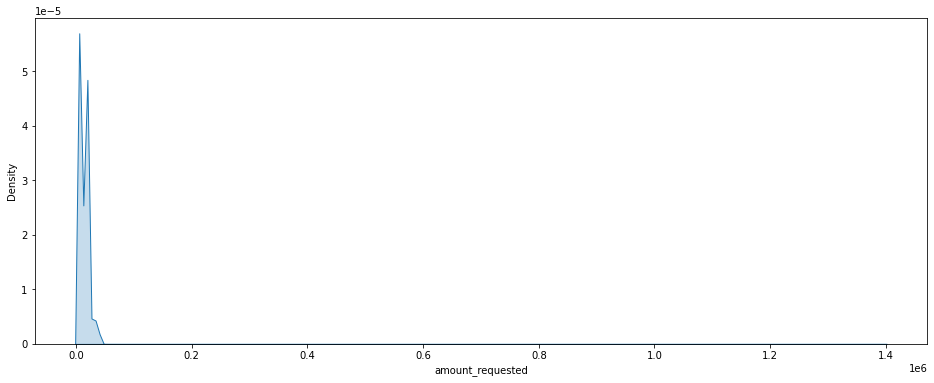

In [ ]:
# KDE plot
plt.figure(figsize=(16,6))
sns.kdeplot(data=data['amount_requested'], shade=True)

**Debet to income ratio**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


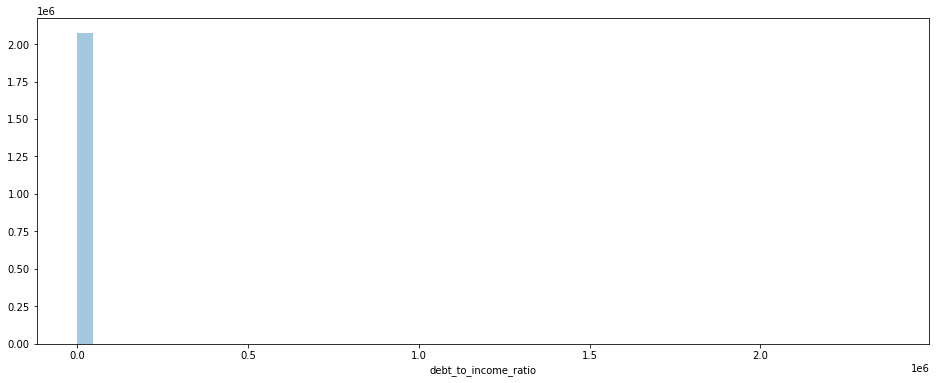

In [ ]:
#Histogram of distribution
plt.figure(figsize=(16,6))
sns.distplot(a=data['debt_to_income_ratio'], kde=False)

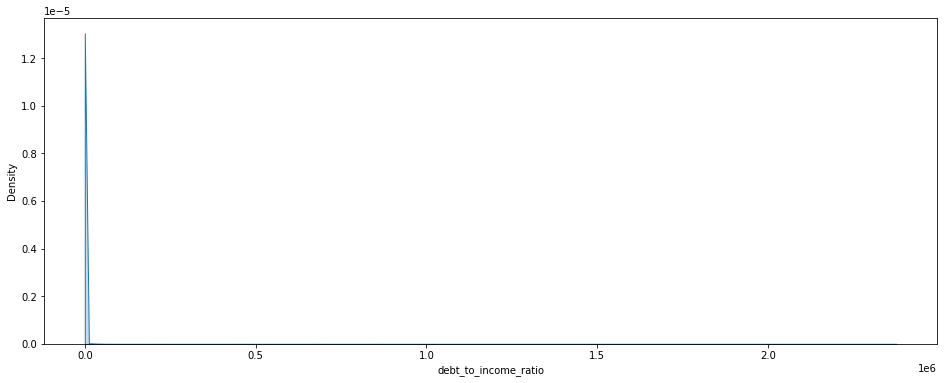

In [ ]:
# KDE plot 
plt.figure(figsize=(16,6))
sns.kdeplot(data=data['debt_to_income_ratio'], shade=True)

**Let's now see the correlation between continuous variables:**

**There is no column with visible different behaviour**

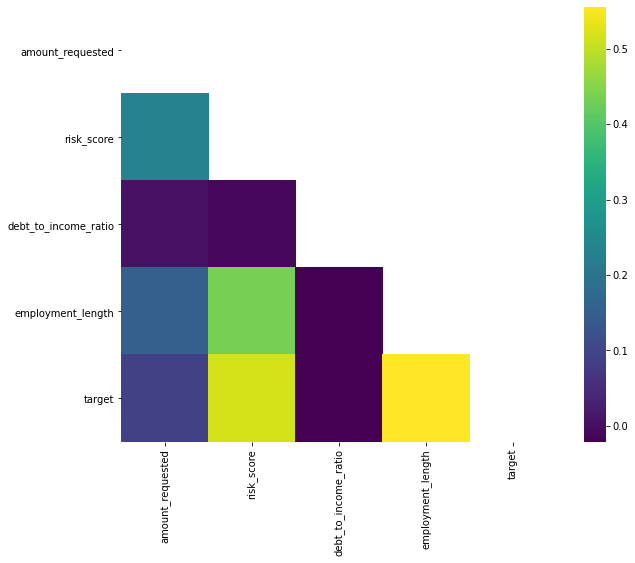

In [ ]:
plt.figure(figsize=(10,8))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), cmap='viridis', mask=mask, annot=False, square=True)

**There are some yellowish squares. This indicates almost perfect correlation between many variables. Let's dig deeper:**

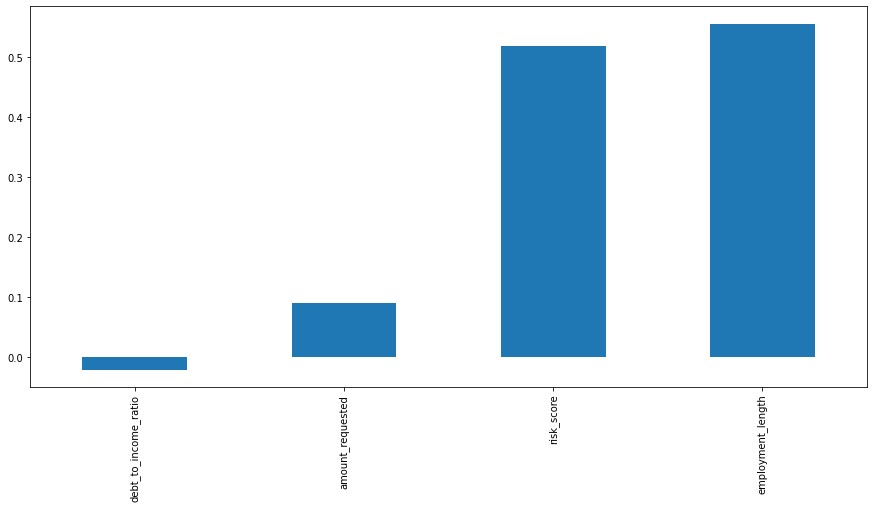

In [ ]:
# checking correlation of features to the new loan_paid column


plt.figure(figsize=(15,7))
new_corr = data.corr().iloc[:-1,-1].sort_values()
new_corr.plot.bar(rot=90)

In [ ]:
features = list(data.columns)
print(*features,sep='\n')

amount_requested
risk_score
debt_to_income_ratio
employment_length
target


**Checking features against our target variable**

**amount_requested**

In [ ]:
C = np.corrcoef(data.amount_requested,data.target)
print(C)

[[1.         0.09056719]
 [0.09056719 1.        ]]


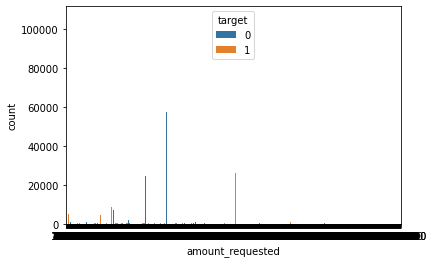

In [ ]:
# checking count per grade and target
sns.countplot(x=data.amount_requested, hue=data.target)

**risk_score**

In [ ]:
C = np.corrcoef(data.risk_score,data.target)
print(C)

[[1.         0.51796068]
 [0.51796068 1.        ]]


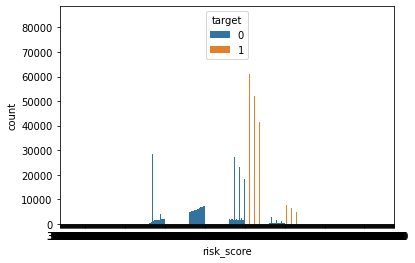

In [ ]:
sns.countplot(x=data.risk_score, hue=data.target)

**debt_to_income_ratio**

In [ ]:
C = np.corrcoef(data.debt_to_income_ratio,data.target)
print(C)

[[ 1.        -0.0209685]
 [-0.0209685  1.       ]]


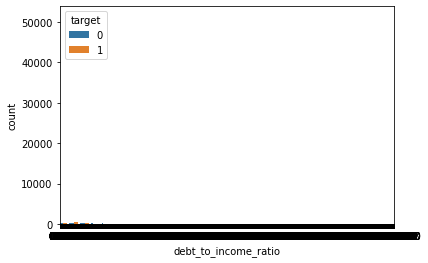

In [ ]:
# sns.countplot(x=data.debt_to_income_ratio, hue=data.target)

**employment_length**

In [ ]:
C = np.corrcoef(data.employment_length,data.target)
print(C)

[[1.         0.55513157]
 [0.55513157 1.        ]]


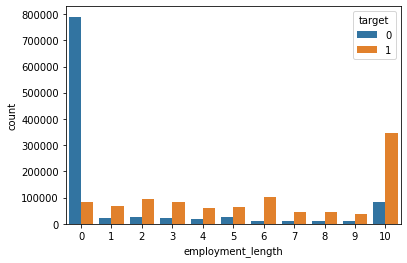

In [ ]:
sns.countplot(x=data.employment_length, hue=data.target)

**By above steps we can conclude that our data is not having much noice to reduce so we can move to Step2 Modelling since our data is already numeric and does not need any changes**